# Урок 4. РАБОТА С ГРЯЗНЫМИ ДАННЫМИ

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns

### 1

В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:

'df has y rows and x columns'

где y — число строк, а x — число колонок.

In [7]:
rows, cols = df.shape

In [8]:
print(f'df has {rows} rows and {cols} columns')

df has 30 rows and 4 columns


### 2

Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит. Например, для такого датафрейма:

In [9]:
df = pd.DataFrame({'client_id': np.random.randint(1, 10000, 30),
                   'sex': np.random.choice([0, 1], 30),
                   'wealth': np.random.choice(['low', None, 'high'], 30),
                   'age': np.random.randint(20, 70, 30)})

In [10]:
na_number = df.isna().sum()

In [11]:
na_number

client_id     0
sex           0
wealth       13
age           0
dtype: int64

### 3

Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [12]:
df_types = df.dtypes

In [13]:
df_types

client_id     int32
sex           int32
wealth       object
age           int32
dtype: object

### 4

Внезапно оказалось, что в колонке age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [14]:
df = df.astype({'age': 'str'})
df.dtypes

client_id     int32
sex           int32
wealth       object
age          object
dtype: object

In [15]:
df = df.astype({'age': 'int'})
df.dtypes

client_id     int32
sex           int32
wealth       object
age           int32
dtype: object

### 5

Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [16]:
df = df.drop(['sex', 'age'], axis=1)

In [17]:
df.head()

,client_id,wealth
0,1249,high
1,3849,None
2,9093,None
3,6020,None
4,3996,low


### 6

А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id. Сохраните в переменную df датафрейм, в котором не будет дубликатов по колонке client_id, оставив первую строку с id

In [18]:
len(df)

30

In [19]:
df = df.drop_duplicates(subset=['client_id'], keep='first')

In [20]:
len(df)

30

### 7

А сейчас ненадолго вернемся к чистому Python. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. Если вам попался 0, то нужно прекратить этот цикл. Например,

numbers = [1, -2, 3, 0, -3, 2]

Тогда positive_numbers должен быть:



In [21]:
numbers = [1, -2, 3, 0, -3, 2]

In [22]:
positive_numbers = []
for num in numbers:
    if num == 0:
        break
    elif num > 0:
        positive_numbers.append(num)
positive_numbers

[1, 3]

### 8

Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.

Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [23]:
path_to_file = '3_taxi_peru.csv'

In [24]:
taxi = pd.read_csv(path_to_file, sep=';')

In [25]:
for col in ['start_at', 'end_at', 'arrived_at']:
    taxi[col] = pd.to_datetime(taxi[col])

In [26]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [27]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

### ★ 9

Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]').

In [28]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')

### 10

Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.

Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [29]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0)].driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

### ★ 11

Подумайте, что может влиять на число опозданий из прошлого задания 🤔

__Гипотеза 1: у него самые долгие поездки, и не получается рассчитывать время (например, стоял в пробке)__

Проверим: посчитаем медиану продолжительности поездок по водителям, и посмотрим, войдет ли искомый водитель в топ:

In [30]:
taxi['on_the_way'] = (taxi['end_at'] - taxi['start_at']).astype('timedelta64[m]')

In [31]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,on_the_way
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,45.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,3.0
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,"-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,3.0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,"-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,3.0
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,"-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,12.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,"-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,30.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,"-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,22.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,"-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,41.0


In [32]:
taxi.query('start_type == "reserved"').groupby('driver_id', as_index=False).agg({'on_the_way': 'median'}).sort_values('on_the_way', ascending=False).head(10)

,driver_id,on_the_way
86,a7b047c6a09ccb85e9980d80ffaadb3d,145.0
72,86981d5cc39076d9d0281221fe19f3fa,86.0
2,0fd4a08189ac948f6beaa2d3145c81b6,85.0
22,2d163dcf6f3e01abf4af5b2a721ec5ac,84.0
134,f8cd07f929f6884cd5fea893f4da3461,83.0
141,ff5c924e0b630fd7c019a4234058deca,80.5
59,660b608a136931aa5ab0d31556ede173,77.0
74,8a122c8845dc5eebe7d584eb30428057,74.5
92,b1a3f957deba8f50052700bfb28a3fa2,67.0
95,b4f2c132de1648fecf41bb1651525c91,67.0


Здесь искомого айди нет (406921adcca37705ef527b4246c0cfea). Наш водитель не в топ-10, так что гипотезу отбрасываем.

__Гипотеза 2: у него в принципе больше всех поездок, поэтому он и опаздывает больше всех. Проверим: найдем топ-5 по числу поездок:__

In [34]:
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,on_the_way
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,45.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,3.0
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,"-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,3.0


Проверим: топ-5 водителей по числу поездок:

In [128]:
journeys = taxi.query('start_type == "reserved"') \
                     .groupby('driver_id', as_index=False) \
                     .agg({'journey_id': 'count'}) \
                     .sort_values('journey_id', ascending=False) \
                     .rename(columns={'journey_id': 'n_journeys'})
journeys.head()

,driver_id,n_journeys
119,d665fb9f75ef5d9cd0fd89479380ba78,579
109,c814db2127582cf95dea1f74f43127c2,385
34,406921adcca37705ef527b4246c0cfea,363
143,ff5c924e0b630fd7c019a4234059fdf4,359
33,406921adcca37705ef527b4246bbbff5,346


Наш водитель на 3м месте, но не на 1м. Сравним с топом "опаздывающих":

In [129]:
lates = taxi.query('start_type == "reserved" & wait_time > 0') \
            .groupby('driver_id', as_index=False) \
            .agg({'journey_id': 'count'}) \
            .sort_values('journey_id', ascending=False) \
            .rename(columns={'journey_id': 'n_lates'})
lates.head()

,driver_id,n_lates
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45


Видим, что трое водителей присутствуют в обоих топах. Логично – кто больше ездит, тот больше и опаздывает. Попробуем посмотреть не на абсолютное число опозданий, а на их долю – и там, возможно, наш водитель будет не самым опаздывающим.

Снова посмотрим топ-5 по количеству поездок:

In [131]:
driver_history = journeys.merge(lates, on='driver_id')
driver_history['late_score'] = round(driver_history.n_lates / driver_history.n_journeys, 2)
driver_history.sort_values('n_lates', ascending=False)

,driver_id,n_journeys,n_lates,late_score
2,406921adcca37705ef527b4246c0cfea,363,67,0.18
0,d665fb9f75ef5d9cd0fd89479380ba78,579,59,0.10
5,ec84a73745199ff840ecafcb924383ad,330,57,0.17
14,56f59b58bcbbd1cdabc3652e713134c2,130,51,0.39
1,c814db2127582cf95dea1f74f43127c2,385,45,0.12
...,...,...,...,...
85,b44159c128d31f55629260b671ab83ac,6,1,0.17
84,2ca81f8112b8c60af222ee2ed746de12,6,1,0.17
83,4851ee4c867c9b49b909c1adb76c31e9,8,1,0.12
73,b68895736389f2949faa8c73555b81ac,15,1,0.07


Здесь наш водитель на первом месте по доле опозданий – опоздания случились в 67 поездках из 363, или в 18% случаев.
Но в целом среди всех водителей он не так плох: около половины водителей опаздывали чаще (медианная доля опозданий 17,4%):

In [132]:
driver_history.late_score.describe()

count    105.000000
mean       0.219905
std        0.167398
min        0.020000
25%        0.120000
50%        0.170000
75%        0.260000
max        1.000000
Name: late_score, dtype: float64

Видим, что трое водителей присутствуют в обоих топах. Логично – кто больше ездит, тот больше и опаздывает. Попробуем посмотреть не на абсолютное число опозданий, а на их долю – и там, возможно, наш водитель будет не самым опаздывающим.

In [82]:
taxi.query('start_type == "reserved"').driver_id.value_counts().head() / taxi.query('start_type == "reserved" & wait_time > 0').driver_id.value_counts().head()

406921adcca37705ef527b4246bbbff5         NaN
406921adcca37705ef527b4246c0cfea    5.417910
56f59b58bcbbd1cdabc3652e713134c2         NaN
c814db2127582cf95dea1f74f43127c2    8.555556
d665fb9f75ef5d9cd0fd89479380ba78    9.813559
ec84a73745199ff840ecafcb924383ad         NaN
ff5c924e0b630fd7c019a4234059fdf4         NaN
Name: driver_id, dtype: float64

Вывод – наш водитель:
    
– один из самых активных (совершает много поездок)
– не очень пунктуальный (хоть и не самый)
Сойдясь в одной точке, эти факторы вывели его в топ опаздывающих. Будь он чуть пунктуальней, или езди чуть реже – этого бы не случилось.

Третим возможным фактором является то, что в топе самых активных водителей рядом с нашим героем оказались самые ответственные люди - их доля опозданий меньше, чем у 75% водителей и с ними просто трудно конкурировать. Другие два варианта ответа не связаны с водителем: поставленная оценка от водителя вряд ли влияет на скорость самой поездки, а цвет машины – тем более :)

Поэтому верный ответ:
    
· Цвет машины  
· Поставленная водителем оценка клиента  
· __Пунктуальность водителя__    
· __Число взятых заказов__  

### ★ 12

Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели.

In [134]:
taxi['month'] = taxi.start_at.dt.month

In [136]:
taxi['weekday'] = taxi.start_at.dt.day_name()

In [138]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,on_the_way,n_journeys,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,45.0,3.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,NaN,NaT,iPhone,NaN,NaN,NaN,3.0,55.0,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,NaN,NaT,iPhone,NaN,NaN,NaN,3.0,3.0,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,NaN,NaT,iPhone,NaN,NaN,NaN,3.0,16.0,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,72.0,14.0,9,Saturday


### ★ 13

Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 

Вопрос: в каком летнем месяце было сделано наименьшее число заказов?

<AxesSubplot:xlabel='month', ylabel='count'>

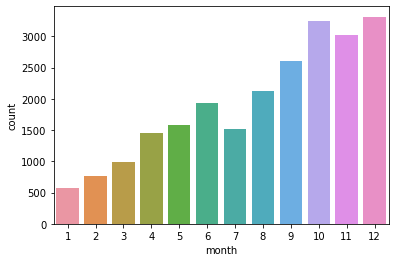

In [140]:
sns.countplot(data=taxi, x='month')

### ★ 14

А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке.

Вопрос: в какой день недели суммарно поступает меньше всего заказов?

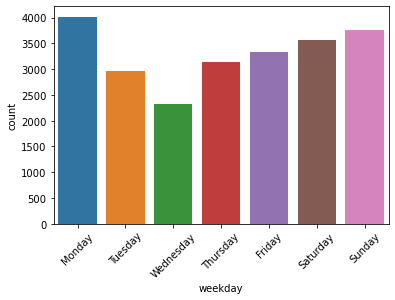

In [143]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.countplot(data=taxi, x='weekday', order=order)
ax.tick_params(axis='x', rotation=45)

### ★ 15

Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

DAU (daily active users) – число уникальных пользователей за день  
WAU (weekly active users) – число уникальных пользователей за неделю  
MAU (monthly active users) – число уникальных пользователей за месяц  
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.  Постройте график MAU и выберите верные утверждения. 

__· В течение всего года число уникальных пользователей увеличивалось__  
__· MAU за апрель примерно в 2.5 раза больше, чем за январь__  
· Летом наблюдался спад числа уникальных пользователей в месяц  
· Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось

In [146]:
mau = taxi.groupby('month').user_id.nunique()

In [147]:
mau

month
1     102
2     110
3     162
4     253
5     275
6     309
7     318
8     377
9     416
10    437
11    504
12    569
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

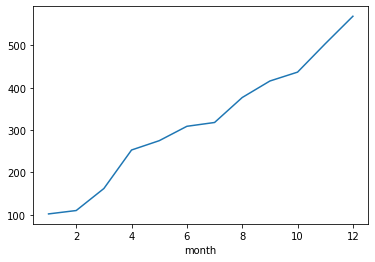

In [148]:
mau.plot.line()

<AxesSubplot:xlabel='month', ylabel='user_id'>

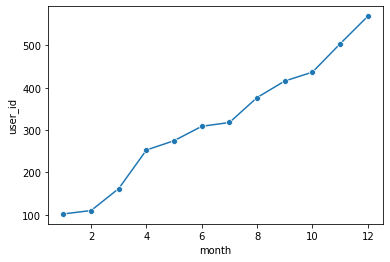

In [149]:
sns.lineplot(data=mau, marker='o')